# Assignment 8
## Due June 18th
### names:

In [20]:
#%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.collections as mc
import numpy as np
from numpy import linalg as LA
from sklearn.datasets import make_classification
from sklearn.gaussian_process.kernels import RBF
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import os

#Creater a folder for images
path = os.path.dirname(os.path.abspath('Assignment8_bodden.ipynb')) + '\Images'
if not os.path.exists(path):
    os.makedirs(path)

np.random.seed(42)

## Exercise 1

In [21]:
def get_cicle_data(n=50, r=1):
    
    np.random.seed(n)
    
    thetas = np.random.uniform(0, 2*np.pi, n)
    data = np.array([r * np.sin(thetas), r * np.cos(thetas)]).T + np.random.normal(scale=1/8, size=(n,2))
    
    return data

In [22]:
def get_gaussian_data(n, mean=0.0, sigma=1.0):
    
    np.random.seed(n)
    
    data = np.random.normal(loc=mean, scale=sigma, size=(n,2))
    
    return data

### a)

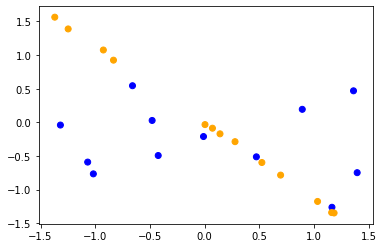

In [23]:
data, labels = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=0)
plt.figure()
plt.scatter(data[:,0], data[:,1], c= ['blue' if l == 1 else 'orange' for l in labels])
plt.savefig('Images/1a.png')

### b)

In [72]:
def PCA(xs, l):
    x = xs
    mu = np.mean(x, axis=0)
    N = len(x)    
    C = (x @ x.T)/N    
    (u, s, V) = np.linalg.svd(x)    
    eigvals = s
    eigenvec = V.T
    #Center data if not done already
    mean_x = np.mean(xs, axis = 0)    
    #xs = xs - mean_x
    
    #C = np.matmul(xs.T, xs)
    
    #(eigvals, eigenvec) = np.linalg.eigh(C)
    print(eigvals.shape)

    #Sort the eigenvalues and eigenvectors in descending order
    eigenvec = eigenvec[np.argsort(eigvals)[::-1]].T
    eigvals = np.sort(eigvals)[::-1]

    #Choose the l larges eigenvalues and corresponding vectors
    eigvals_l = eigvals[:l]
    eigenvec_l = eigenvec[:, :l]
    
    ys = np.matmul(eigenvec_l.T, xs.T)
    
    P = np.matmul(eigenvec_l, eigenvec_l.T)
    zs = np.matmul(xs, P.T) + mean_x
    
    return (ys, zs, eigvals, eigenvec_l)

(2,)


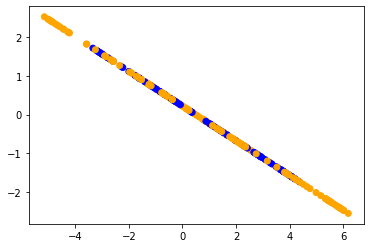

In [73]:
(ys, zs, eigvals, eigenvec_l) = PCA(data, 1)
plt.figure()
plt.scatter(zs[:,0], zs[:,1], c= ['blue' if l == 1 else 'orange' for l in labels])
plt.savefig('Images/1b.png')

### c)

<Figure size 432x288 with 0 Axes>

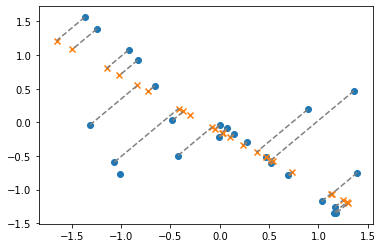

In [26]:
lines = [[(data[i, 0], data[i, 1]), (zs[i, 0], zs[i, 1])] for i in range(1, len(data))]
lc = mc.LineCollection(lines, colors = 'grey', linestyle='dashed')

plt.figure()
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.scatter(data[:,0], data[:,1], marker='o')#c= ['blue' if l == 1 else 'orange' for l in labels])
ax.scatter(zs[:,0], zs[:,1], marker='x')#c= ['blue' if l == 1 else 'orange' for l in labels])
plt.savefig('Images/1c.png')

### d)

In [27]:
a = get_cicle_data(25, 1)
b = get_cicle_data(25, 3)
data = np.concatenate([a,b])
labels = np.concatenate([np.zeros(a.shape[0]), np.ones(b.shape[0])])

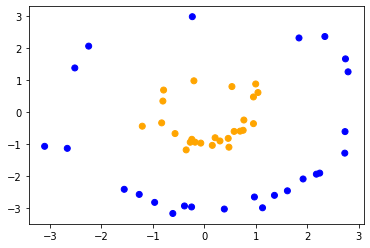

In [28]:
plt.figure()
plt.scatter(data[:,0], data[:,1], c= ['blue' if l == 1 else 'orange' for l in labels])
plt.savefig('Images/1d_1.png')

In [29]:
(ys, zs, eigvals, eigenvec_l) = PCA(data, 1)

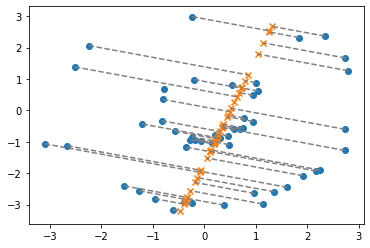

In [30]:
lines = [[(data[i, 0], data[i, 1]), (zs[i, 0], zs[i, 1])] for i in range(1, len(data))]
lc = mc.LineCollection(lines, colors = 'grey', linestyle='dashed')

fig, ax = pl.subplots()
ax.add_collection(lc)
ax.scatter(data[:,0], data[:,1], marker='o')#c= ['blue' if l == 1 else 'orange' for l in labels])
ax.scatter(zs[:,0], zs[:,1], marker='x')#c= ['blue' if l == 1 else 'orange' for l in labels])
plt.savefig('Images/1d_2.png')

### e)

In [31]:
data, labels = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=0)
data[:, 0] = 100 * data[:, 0] 

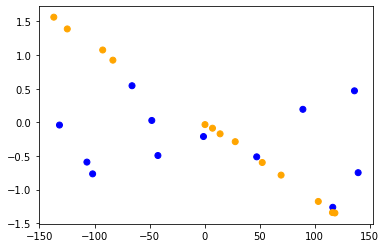

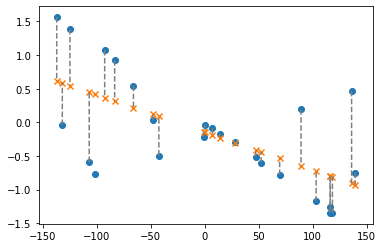

In [32]:
plt.figure()
plt.scatter(data[:,0], data[:,1], c= ['blue' if l == 1 else 'orange' for l in labels])
plt.savefig('Images/1e_1.png')

(ys, zs, eigvals, eigenvec_l) = PCA(data, 1)

lines = [[(data[i, 0], data[i, 1]), (zs[i, 0], zs[i, 1])] for i in range(1, len(data))]
lc = mc.LineCollection(lines, colors = 'grey', linestyle='dashed')

fig, ax = pl.subplots()
ax.add_collection(lc)
ax.scatter(data[:,0], data[:,1], marker='o')#c= ['blue' if l == 1 else 'orange' for l in labels])
ax.scatter(zs[:,0], zs[:,1], marker='x')#c= ['blue' if l == 1 else 'orange' for l in labels])
plt.savefig('Images/1e_2.png')

# Exercise 2)

In [33]:
data = np.concatenate([get_cicle_data(100, 2),
                       get_cicle_data(100, 4),
                       get_cicle_data(100, 6)])

labels = np.concatenate([np.zeros(100),
                         np.ones(100),
                         2 * np.ones(100)])

### a)

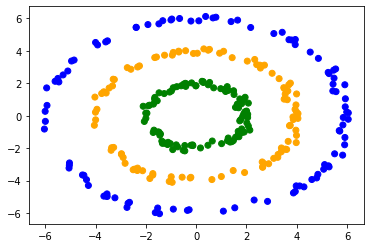

In [34]:
plt.figure()
plt.scatter(data[:,0], data[:,1], c= ['blue' if l == 2 else ('orange' if l == 1  else 'green') for l in labels])
plt.savefig('Images/2a.png')

### b)

In [35]:
def kernel_PCA(xs, kernel, l=2):
    #Centering the kernel:
    n1 = np.ones_like(kernel)/len(kernel)
    
    K_cen = kernel - np.matmul(n1, kernel) - np.matmul(kernel, n1) + np.matmul(n1, np.matmul(kernel, n1))
    
    (eigvals, eigenvec) = np.linalg.eigh(kernel)
    
    #Sort the eigenvalues and eigenvectors in descending order
    eigenvec = eigenvec[np.argsort(eigvals)[::-1]].T
    eigvals = np.sort(eigvals)[::-1]

    #Choose the l larges eigenvalues and corresponding vectors
    eigvals_l = eigvals[:l]
    eigenvec_l = eigenvec[:, :l]
    
    V = np.vstack([eigenvec_l[:,i]/eigvals_l[i] for i in range(0,l)]).T
    
    
    print('V shape {}, kernel shape {}, xs shape {}'.format(V.shape, kernel.shape, xs.shape))
    ys = np.matmul(kernel.T, V)
    print('ys shape {}'.format(ys.shape))
    return ys

### c)

In [36]:
kernel = RBF(length_scale = 5)
K = kernel(data)

### d)

In [37]:
ys = kernel_PCA(data, K, 3)

V shape (300, 3), kernel shape (300, 300), xs shape (300, 2)
ys shape (300, 3)


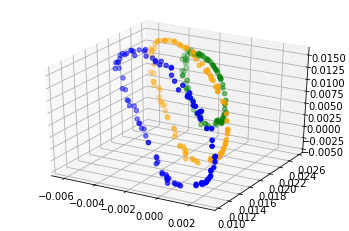

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(ys[:,0], ys[:,1], ys[:,2], c= ['blue' if l == 2 else ('orange' if l == 1  else 'green') for l in labels])
plt.savefig('Images/2d.png')